In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv('/content/drive/My Drive/ColabDataset/WithoutOutliersFlightFare.csv')

In [ ]:
size = (19,9)

sns.set_style('darkgrid')

In [ ]:
data.shape

(227296, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227296 entries, 0 to 227295
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   InvoiceDate    227296 non-null  object 
 1   NetFare        171902 non-null  float64
 2   ProductType    227296 non-null  object 
 3   ItineraryType  194521 non-null  object 
 4   InvoiceTime    227296 non-null  object 
dtypes: float64(1), object(4)
memory usage: 8.7+ MB


In [ ]:
data.describe()

,NetFare
count,171902.000000
mean,4410.347288
std,4403.561738
min,0.000000
25%,1878.000000
50%,3929.000000
75%,6052.000000
max,44000.000000


In [ ]:
data.describe(include='object')

,InvoiceDate,ProductType,ItineraryType,InvoiceTime
count,227296,227296,194521,227296
unique,425,3,2,1412
top,2019-06-05,Air,Domestic,13:31:00
freq,2033,139127,179860,510


In [ ]:
for x in data.columns:
  print("Total % Null value in "+x+" - ",data[x].isna().sum()/len(data)*100)
  print()

Total % Null value in InvoiceDate -  0.0

Total % Null value in NetFare -  24.370864423483034

Total % Null value in ProductType -  0.0

Total % Null value in ItineraryType -  14.419523440799662

Total % Null value in InvoiceTime -  0.0



In [ ]:
net = data[(data['ProductType']!='Air')]['NetFare']

In [ ]:
net.describe()

count    32775.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: NetFare, dtype: float64

In [ ]:
net.isna().sum()

55394

In [ ]:
len(data)

print((net.isna().sum())/len(data)*100)

24.370864423483034


We can clearly see that Other Payment and Payment are only NaN values in the ProductType column

We will drop the those two variable and use only Air Variable

In [ ]:
data = data[data['ProductType']=='Air']

In [ ]:
data.shape

tempData= data.copy()

In [ ]:
for x in data.columns:
  print("Total % Null value in "+x+" - ",data[x].isna().sum()/len(data)*100)
  print()

Total % Null value in InvoiceDate -  0.0

Total % Null value in NetFare -  0.0

Total % Null value in ProductType -  0.0

Total % Null value in ItineraryType -  0.0

Total % Null value in InvoiceTime -  0.0



In [ ]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [ ]:
data['InvoiceTime'] = pd.to_datetime(data['InvoiceTime'])

In [ ]:
data['InvoiceHour'] = data['InvoiceTime'].dt.hour

In [ ]:
data.head()

,InvoiceDate,NetFare,ProductType,ItineraryType,InvoiceTime,InvoiceHour
0,2018-01-12,6550.0,Air,Domestic,2020-06-05 13:01:00,13
1,2018-01-12,6550.0,Air,Domestic,2020-06-05 13:10:00,13
2,2018-11-30,5497.0,Air,Domestic,2020-06-05 14:30:00,14
3,2018-01-12,4818.0,Air,Domestic,2020-06-05 14:09:00,14
4,2018-11-30,1768.0,Air,Domestic,2020-06-05 14:30:00,14


In [ ]:
data['InvoiceTime'] = data['InvoiceTime'].dt.time

In [ ]:
data.head(10)

,InvoiceDate,NetFare,ProductType,ItineraryType,InvoiceTime,InvoiceHour
0,2018-01-12,6550.0,Air,Domestic,13:01:00,13
1,2018-01-12,6550.0,Air,Domestic,13:10:00,13
2,2018-11-30,5497.0,Air,Domestic,14:30:00,14
3,2018-01-12,4818.0,Air,Domestic,14:09:00,14
4,2018-11-30,1768.0,Air,Domestic,14:30:00,14
5,2018-01-12,7300.0,Air,Domestic,13:10:00,13
6,2018-11-30,7050.0,Air,Domestic,17:30:00,17
7,2018-01-12,7300.0,Air,Domestic,14:25:00,14
8,2018-01-12,7650.0,Air,Domestic,14:26:00,14
10,2018-01-12,2400.0,Air,Domestic,15:15:00,15


In [ ]:
data['InvoiceMonth'] = data['InvoiceDate'].dt.month_name()

In [ ]:
data['InvoiceDay'] = data['InvoiceDate'].dt.day_name()

In [ ]:
data['InvoiceQuarter'] = data['InvoiceDate'].dt.quarter

In [ ]:
data.head()

,InvoiceDate,NetFare,ProductType,ItineraryType,InvoiceTime,InvoiceHour,InvoiceMonth,InvoiceDay,InvoiceQuarter
0,2018-01-12,6550.0,Air,Domestic,13:01:00,13,January,Friday,1
1,2018-01-12,6550.0,Air,Domestic,13:10:00,13,January,Friday,1
2,2018-11-30,5497.0,Air,Domestic,14:30:00,14,November,Friday,4
3,2018-01-12,4818.0,Air,Domestic,14:09:00,14,January,Friday,1
4,2018-11-30,1768.0,Air,Domestic,14:30:00,14,November,Friday,4


In [ ]:
data.shape

(139127, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139127 entries, 0 to 227295
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   InvoiceDate     139127 non-null  datetime64[ns]
 1   NetFare         139127 non-null  float64       
 2   ProductType     139127 non-null  object        
 3   ItineraryType   139127 non-null  object        
 4   InvoiceTime     139127 non-null  object        
 5   InvoiceHour     139127 non-null  int64         
 6   InvoiceMonth    139127 non-null  object        
 7   InvoiceDay      139127 non-null  object        
 8   InvoiceQuarter  139127 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 10.6+ MB


In [ ]:
for col in data.columns:
  print(col)
  print(data[col].value_counts())
  print()
  print()

InvoiceDate
2019-06-05    1050
2019-03-05     996
2019-05-15     969
2019-05-13     964
2019-05-20     890
              ... 
2018-05-27      24
2018-04-22      22
2019-04-28      18
2019-04-21      17
2018-07-31       5
Name: InvoiceDate, Length: 425, dtype: int64


NetFare
0.0        1175
5100.0      386
4900.0      350
6850.0      273
3600.0      245
           ... 
20088.0       1
26757.0       1
17780.0       1
24706.0       1
2742.3        1
Name: NetFare, Length: 12756, dtype: int64


ProductType
Air    139127
Name: ProductType, dtype: int64


ItineraryType
Domestic         130003
International      9124
Name: ItineraryType, dtype: int64


InvoiceTime
17:11:00    305
18:06:00    304
17:08:00    293
17:16:00    288
14:46:00    284
           ... 
04:42:00      1
03:19:00      1
03:20:00      1
05:31:00      1
05:00:00      1
Name: InvoiceTime, Length: 1375, dtype: int64


InvoiceHour
17    13485
16    13064
12    12687
15    12611
13    11948
14    11789
11    11367
18    11107
1

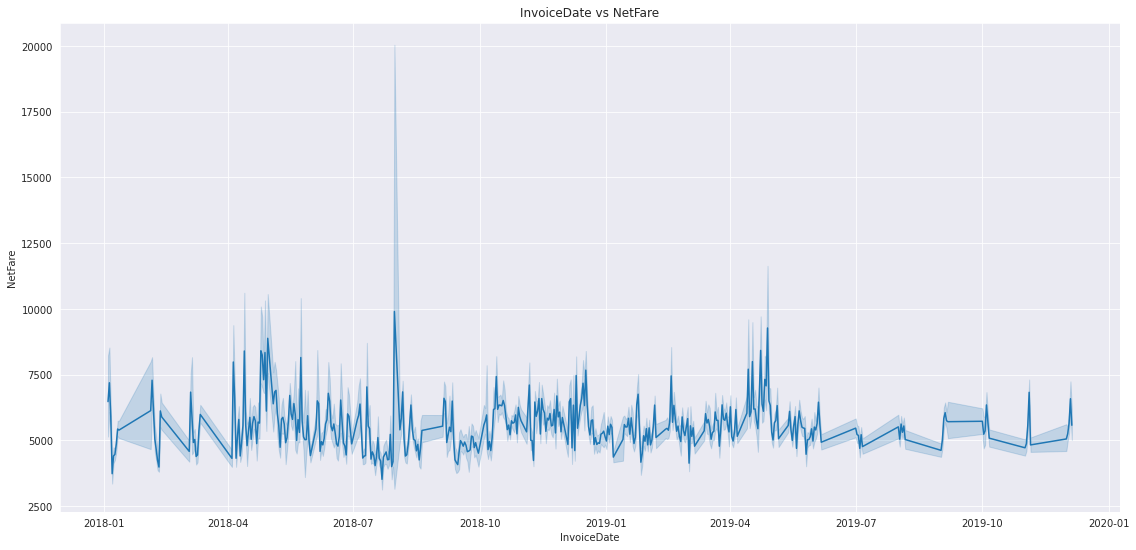

In [ ]:
plt.figure(figsize=size)

sns.lineplot(x='InvoiceDate',y='NetFare',data=data)

plt.title("InvoiceDate vs NetFare")

plt.show()

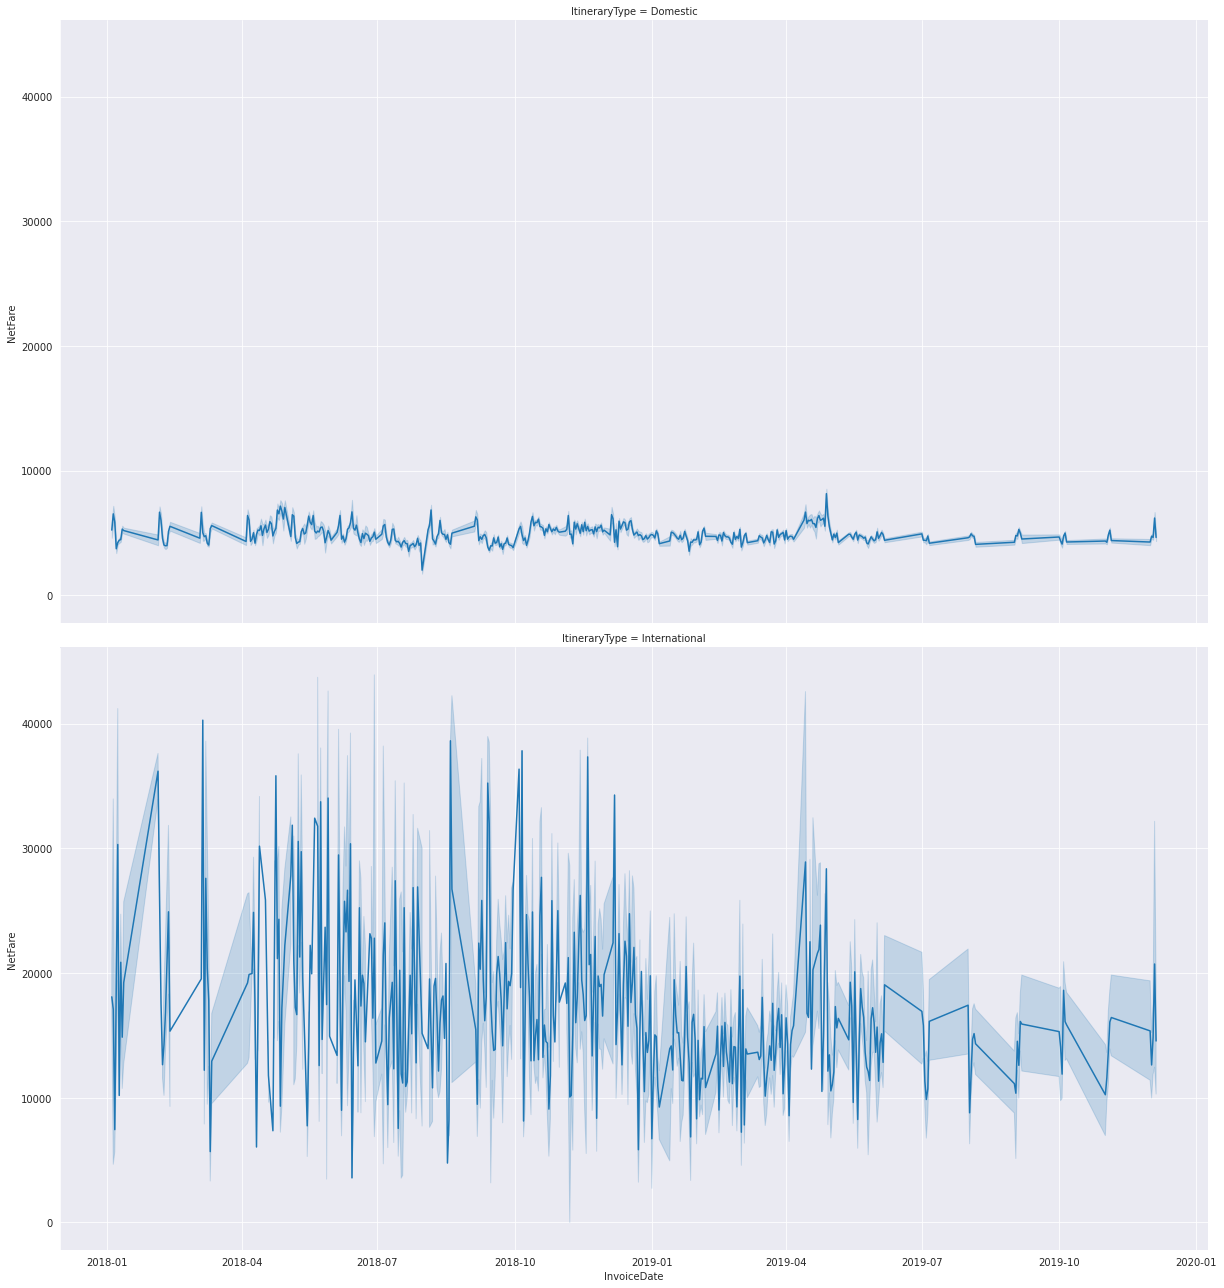

In [ ]:
grid = sns.FacetGrid(data=data,row='ItineraryType',height=9,aspect=1.9)
grid.map(sns.lineplot,'InvoiceDate','NetFare')

plt.show()

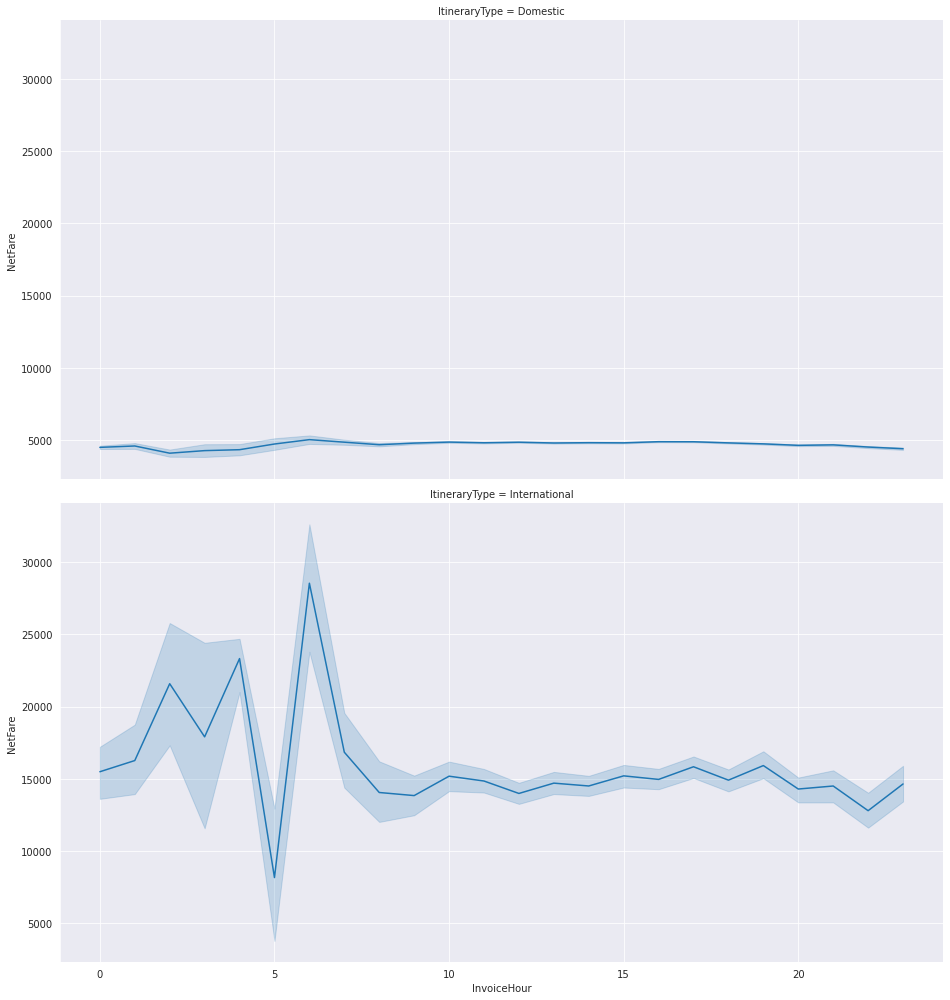

In [ ]:
grid = sns.FacetGrid(data=data,row='ItineraryType',height=7,aspect=1.9)
grid.map(sns.lineplot,'InvoiceHour','NetFare')

plt.show()

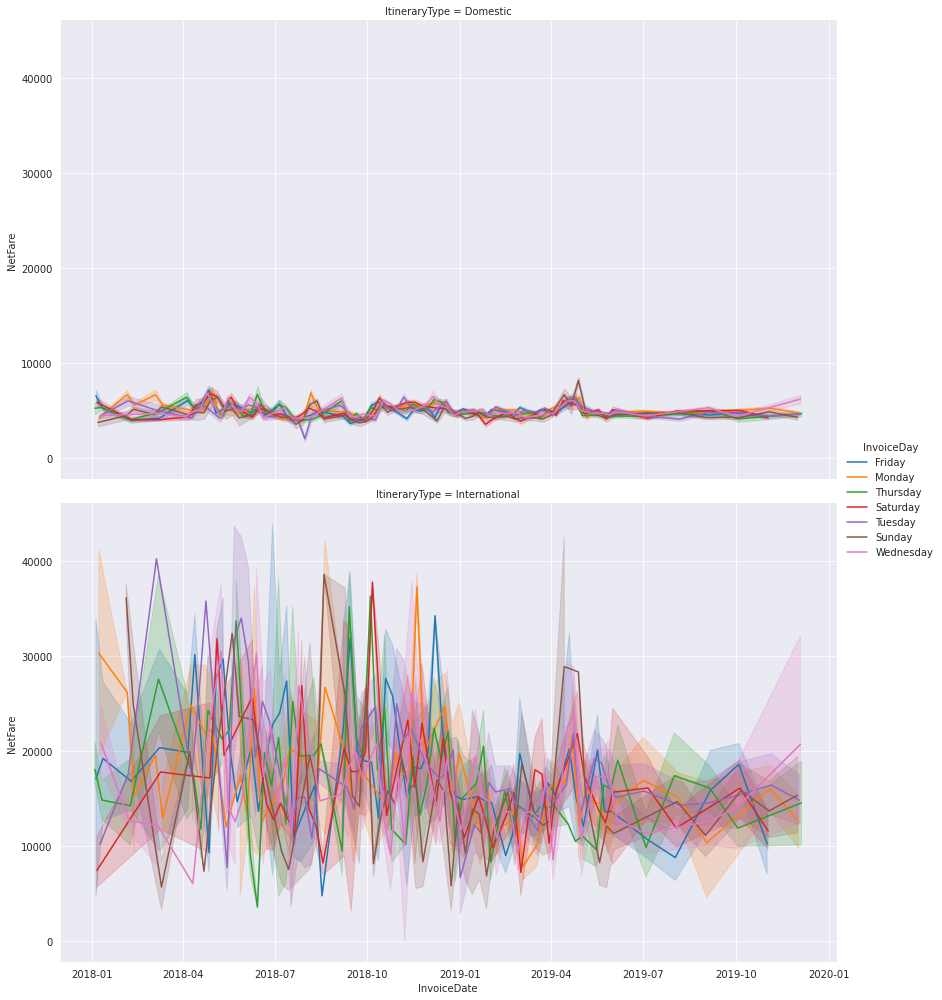

In [ ]:
grid = sns.FacetGrid(data=data,row='ItineraryType',height=7,aspect=1.7,hue='InvoiceDay')
grid.map(sns.lineplot,'InvoiceDate','NetFare')

grid.add_legend()

plt.show()

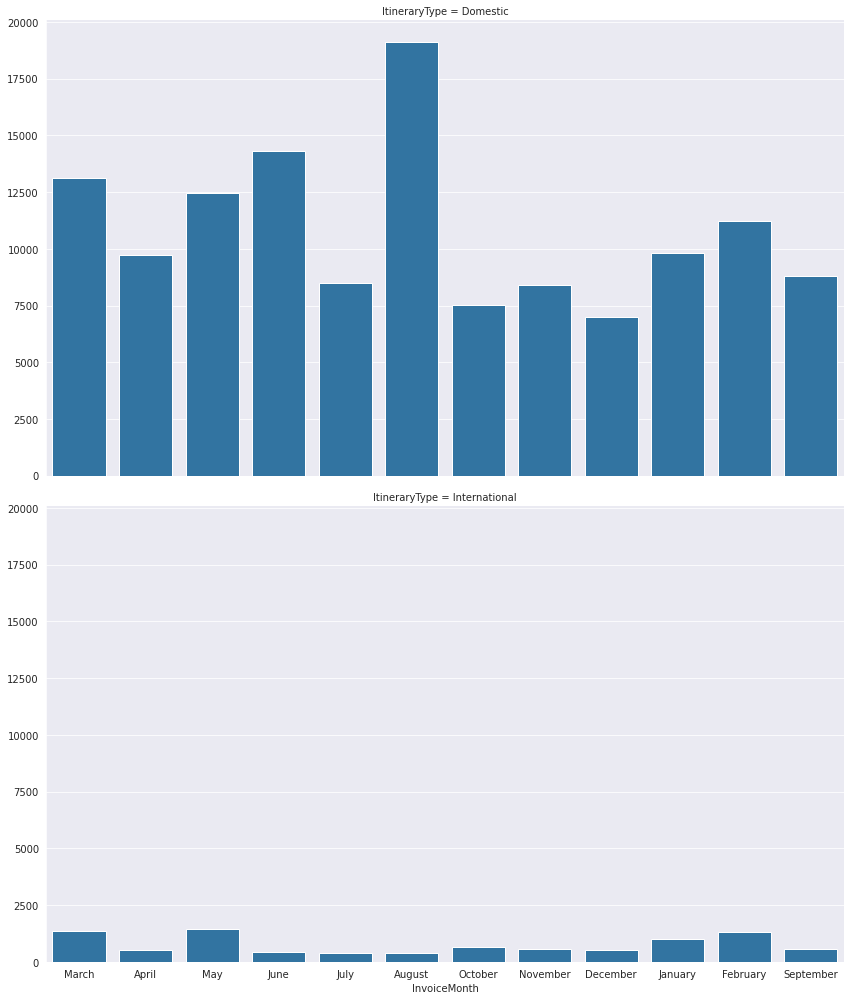

In [ ]:
grid = sns.FacetGrid(data=data,row='ItineraryType',height=7,aspect=1.7)
grid.map(sns.countplot,'InvoiceMonth')

grid.add_legend()

plt.show()

**Domestic**

August -> have maximum numbers of flight Fare count

October and December -> have minimum number of flight Fare count

**International**

May and Feb -> have miniumn number of flight Fare count

June, July and August -> have Lowest Number of Flight Fare

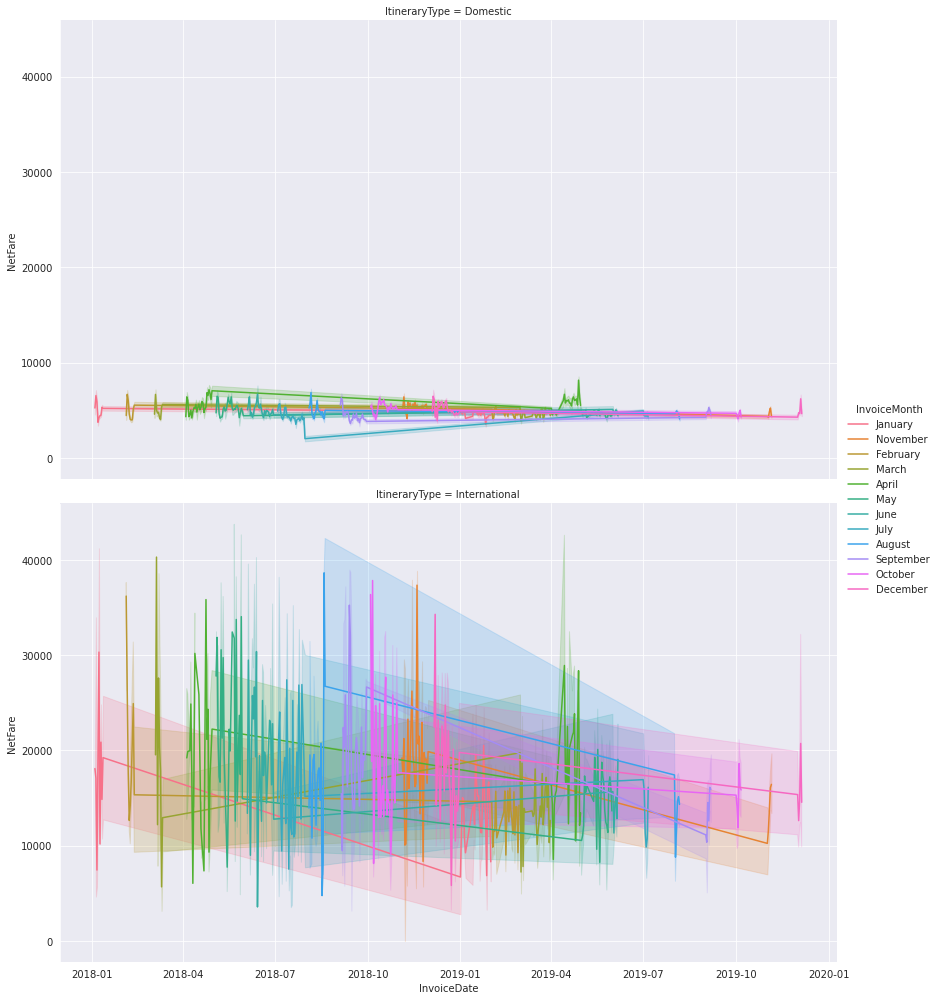

In [ ]:
grid = sns.FacetGrid(data=data,row='ItineraryType',height=7,aspect=1.7,hue='InvoiceMonth')
grid.map(sns.lineplot,'InvoiceDate','NetFare')

grid.add_legend()

plt.show()

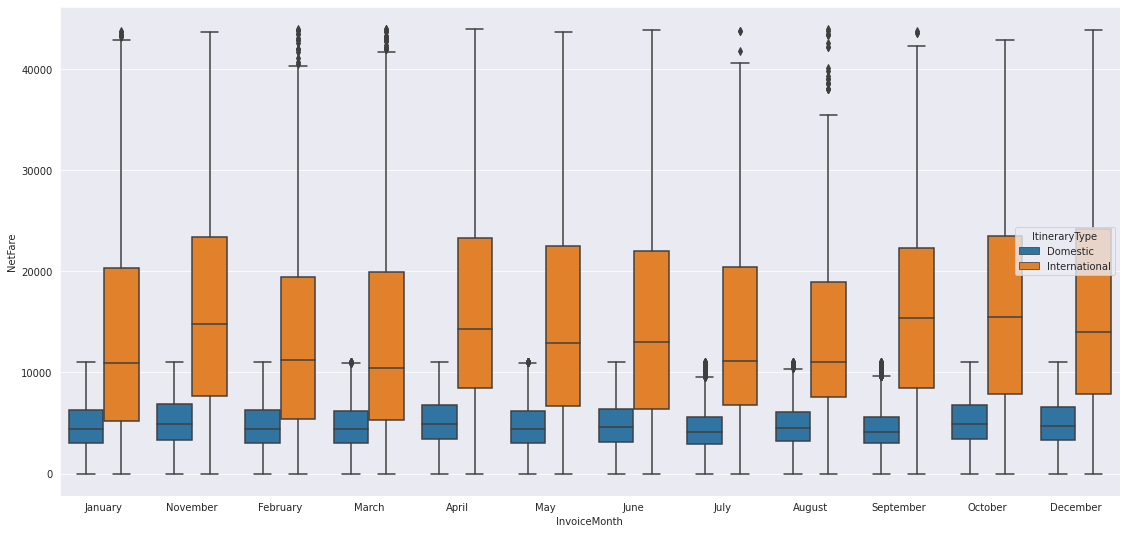

In [ ]:
plt.figure(figsize=size)

sns.boxplot(x='InvoiceMonth',y='NetFare',data=data,hue='ItineraryType')

plt.show()

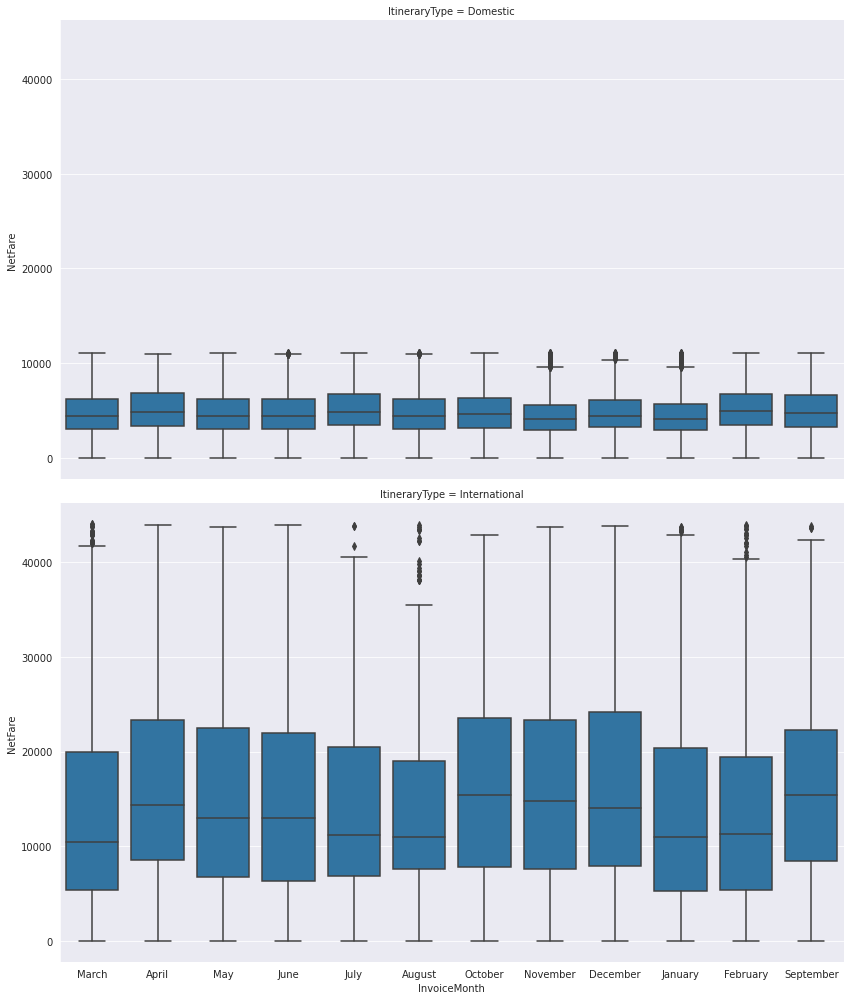

In [ ]:
grid = sns.FacetGrid(data=data,row='ItineraryType',height=7,aspect=1.7)
grid.map(sns.boxplot,'InvoiceMonth','NetFare')

grid.add_legend()

plt.show()

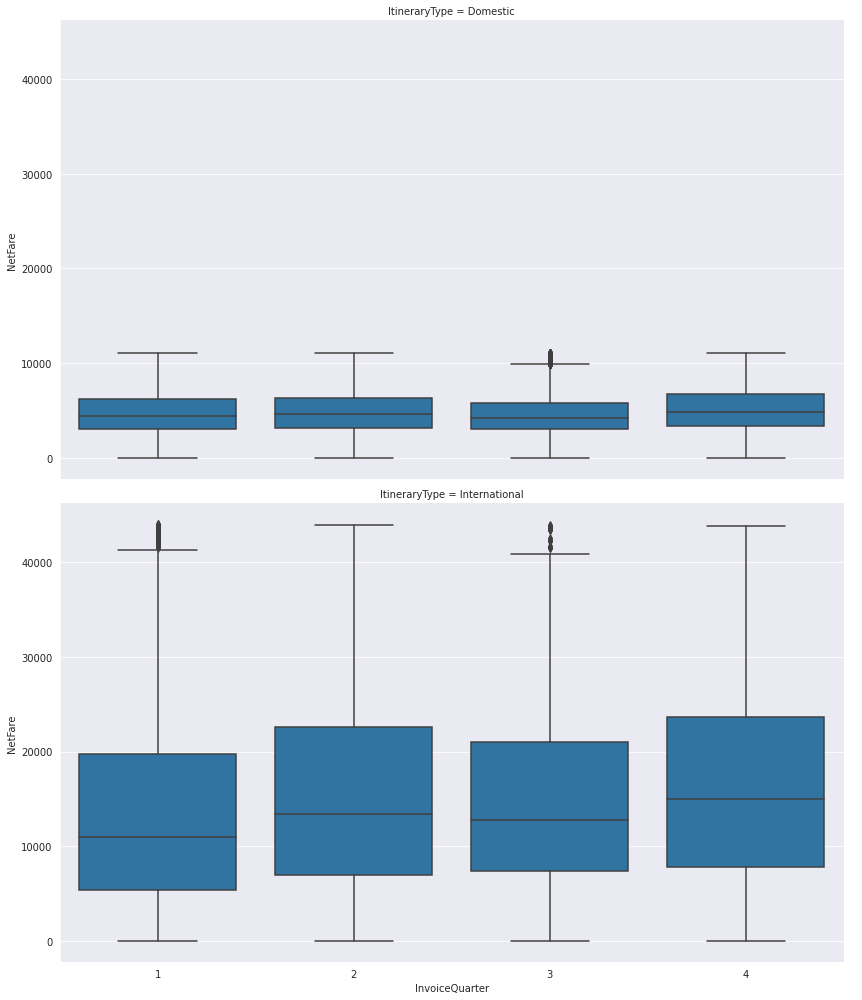

In [ ]:
grid = sns.FacetGrid(data=data,row='ItineraryType',height=7,aspect=1.7)
grid.map(sns.boxplot,'InvoiceQuarter','NetFare')

grid.add_legend()

plt.show()

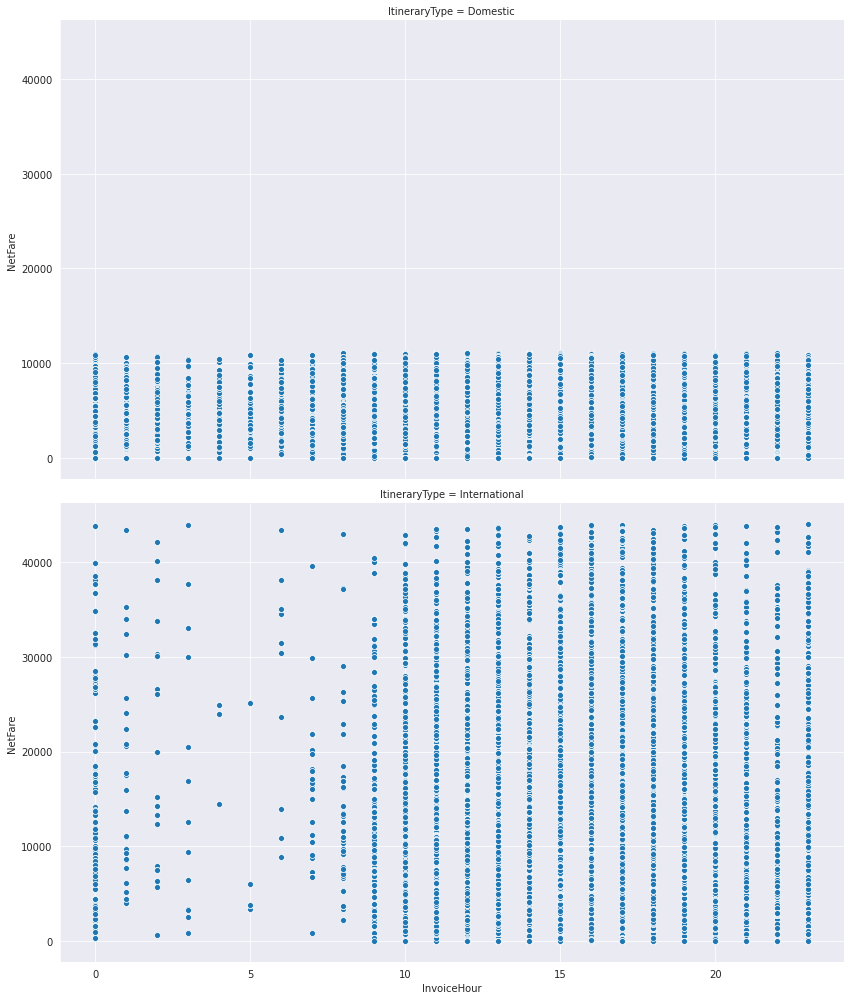

In [ ]:
grid = sns.FacetGrid(data=data,row='ItineraryType',height=7,aspect=1.7)
grid.map(sns.scatterplot,'InvoiceHour','NetFare')

grid.add_legend()

plt.show()

In [ ]:
data['InvoiceDate'].dt.year<19

0         False
1         False
2         False
3         False
4         False
          ...  
227291    False
227292    False
227293    False
227294    False
227295    False
Name: InvoiceDate, Length: 139127, dtype: bool

In [ ]:
data.head(10)

,InvoiceDate,NetFare,ProductType,ItineraryType,InvoiceTime,InvoiceHour,InvoiceMonth,InvoiceDay,InvoiceQuarter
0,2018-01-12,6550.0,Air,Domestic,13:01:00,13,January,Friday,1
1,2018-01-12,6550.0,Air,Domestic,13:10:00,13,January,Friday,1
2,2018-11-30,5497.0,Air,Domestic,14:30:00,14,November,Friday,4
3,2018-01-12,4818.0,Air,Domestic,14:09:00,14,January,Friday,1
4,2018-11-30,1768.0,Air,Domestic,14:30:00,14,November,Friday,4
5,2018-01-12,7300.0,Air,Domestic,13:10:00,13,January,Friday,1
6,2018-11-30,7050.0,Air,Domestic,17:30:00,17,November,Friday,4
7,2018-01-12,7300.0,Air,Domestic,14:25:00,14,January,Friday,1
8,2018-01-12,7650.0,Air,Domestic,14:26:00,14,January,Friday,1
10,2018-01-12,2400.0,Air,Domestic,15:15:00,15,January,Friday,1


In [ ]:
y1 = data[data['InvoiceDate'].dt.year < 2019]
y2 = data[data['InvoiceDate'].dt.year > 2018]

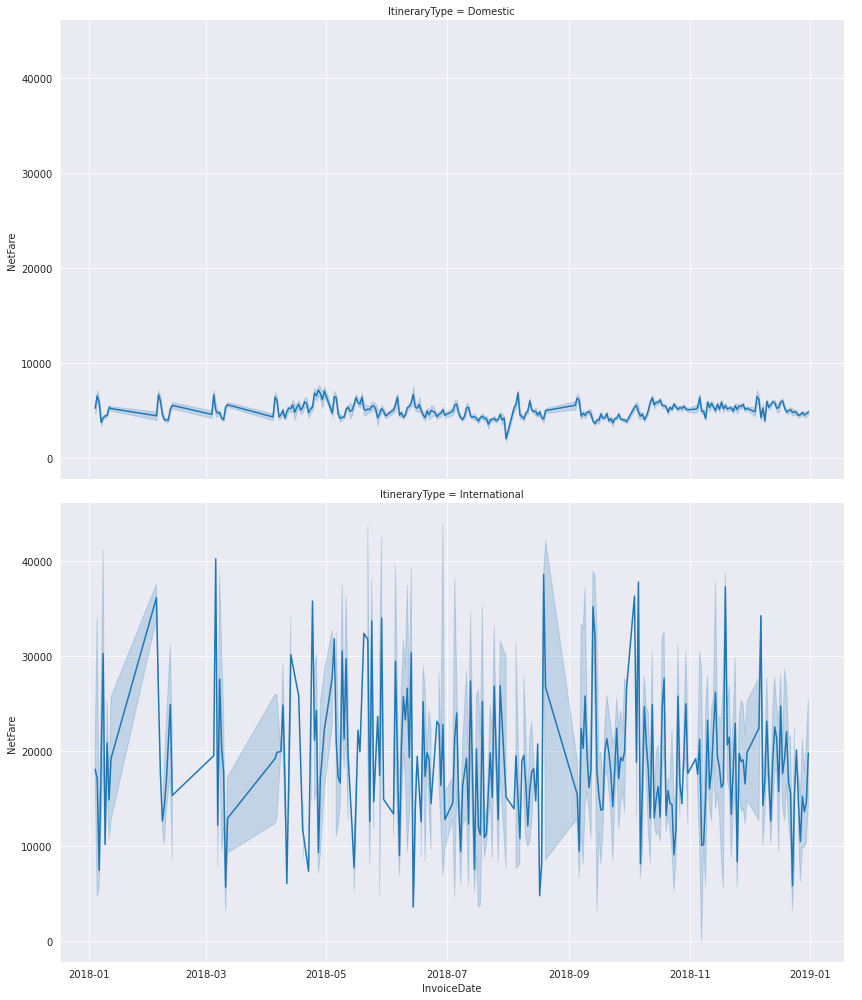

In [ ]:
grid = sns.FacetGrid(data=y1,row='ItineraryType',height=7,aspect=1.7)
grid.map(sns.lineplot,'InvoiceDate','NetFare')

grid.add_legend()

plt.show()

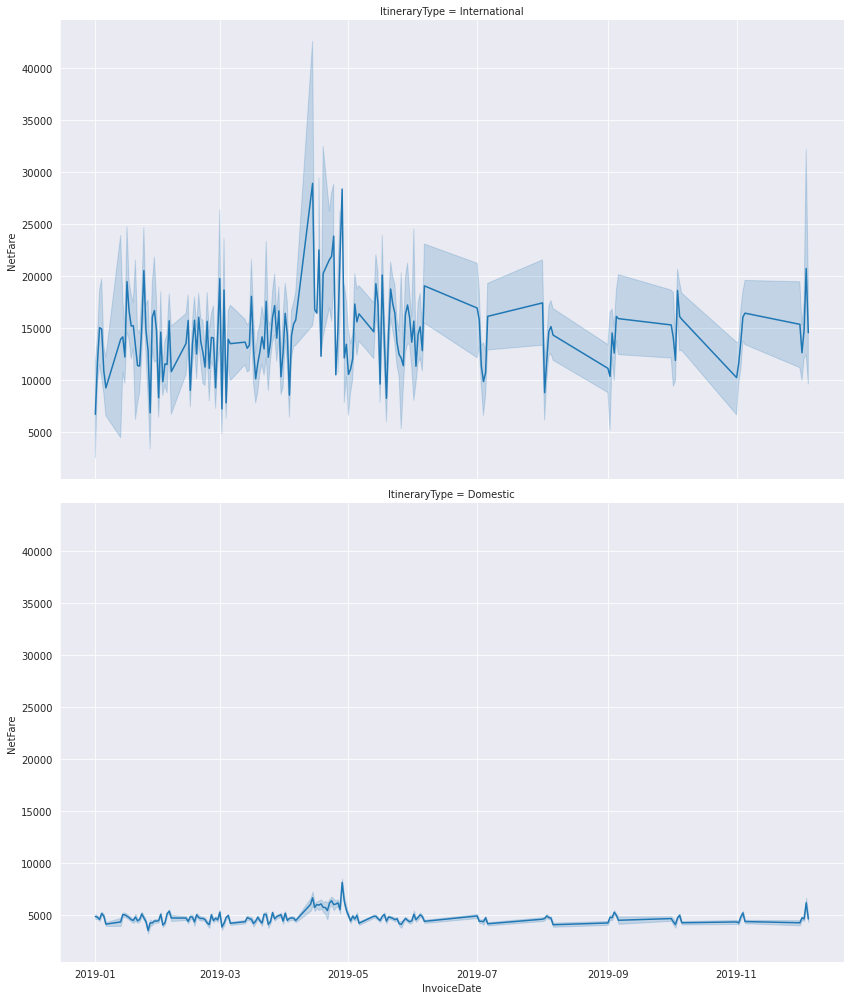

In [ ]:
grid = sns.FacetGrid(data=y2,row='ItineraryType',height=7,aspect=1.7)
grid.map(sns.lineplot,'InvoiceDate','NetFare')

grid.add_legend()

plt.show()

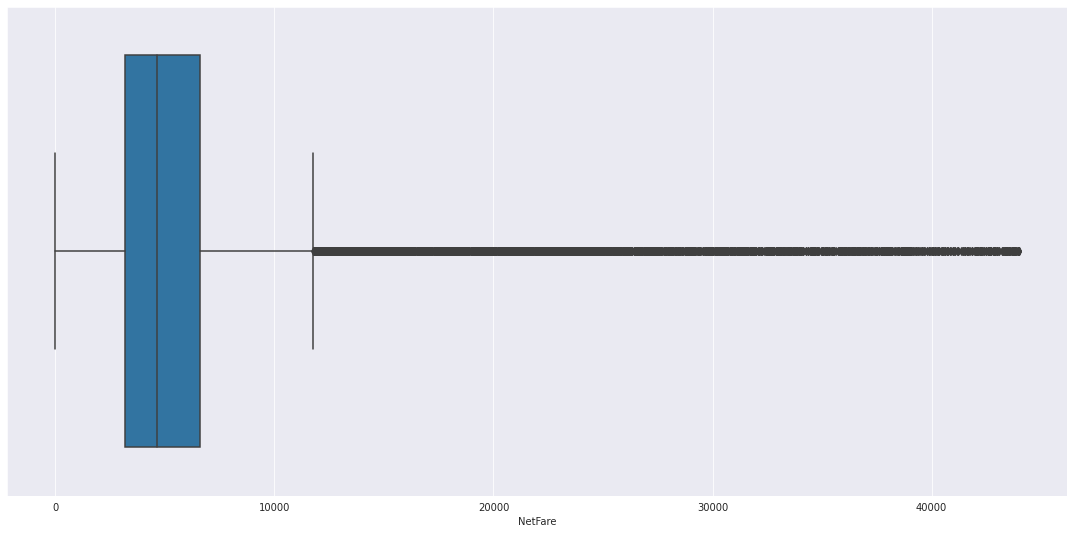

In [ ]:
plt.figure(figsize=size)

sns.boxplot(data['NetFare'])

plt.show()

In [ ]:
data.head(10)

,InvoiceDate,NetFare,ProductType,ItineraryType,InvoiceTime,InvoiceHour,InvoiceMonth,InvoiceDay,InvoiceQuarter
0,2018-01-12,6550.0,Air,Domestic,13:01:00,13,January,Friday,1
1,2018-01-12,6550.0,Air,Domestic,13:10:00,13,January,Friday,1
2,2018-11-30,5497.0,Air,Domestic,14:30:00,14,November,Friday,4
3,2018-01-12,4818.0,Air,Domestic,14:09:00,14,January,Friday,1
4,2018-11-30,1768.0,Air,Domestic,14:30:00,14,November,Friday,4
5,2018-01-12,7300.0,Air,Domestic,13:10:00,13,January,Friday,1
6,2018-11-30,7050.0,Air,Domestic,17:30:00,17,November,Friday,4
7,2018-01-12,7300.0,Air,Domestic,14:25:00,14,January,Friday,1
8,2018-01-12,7650.0,Air,Domestic,14:26:00,14,January,Friday,1
10,2018-01-12,2400.0,Air,Domestic,15:15:00,15,January,Friday,1


In [ ]:
tempData.head(10)

,InvoiceDate,NetFare,ProductType,ItineraryType,InvoiceTime
0,2018-01-12,6550.0,Air,Domestic,13:01:00
1,2018-01-12,6550.0,Air,Domestic,13:10:00
2,2018-11-30,5497.0,Air,Domestic,14:30:00
3,2018-01-12,4818.0,Air,Domestic,14:09:00
4,2018-11-30,1768.0,Air,Domestic,14:30:00
5,2018-01-12,7300.0,Air,Domestic,13:10:00
6,2018-11-30,7050.0,Air,Domestic,17:30:00
7,2018-01-12,7300.0,Air,Domestic,14:25:00
8,2018-01-12,7650.0,Air,Domestic,14:26:00
10,2018-01-12,2400.0,Air,Domestic,15:15:00


In [ ]:
domesticData = tempData[tempData['ItineraryType']=='Domestic']

In [ ]:
internationalData = tempData[tempData['ItineraryType']=='International']

In [ ]:
domesticData['ItineraryType'].value_counts()

Domestic    130003
Name: ItineraryType, dtype: int64

In [ ]:
internationalData['ItineraryType'].value_counts()

International    9124
Name: ItineraryType, dtype: int64

In [ ]:
domesticData.to_csv('/content/drive/My Drive/ColabDataset/DomesticFlightFare.csv',index=False)

In [ ]:
internationalData.to_csv('/content/drive/My Drive/ColabDataset/InternationalFlightFare.csv',index=False)